In [63]:
# importing all the packages and naming them as per our convinience.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [64]:
"""The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables."""
"""Problem statement: predicting turbine energy yield (TEY) using ambient variables as features."""

'Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.'

In [65]:
# Load the dataset using pandas
data = pd.read_csv("E:\\Neural Networks\\gas_turbines.csv")
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [80]:
# info function gives us the raw information of data such as any null values, data types e.t.c.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


<AxesSubplot: >

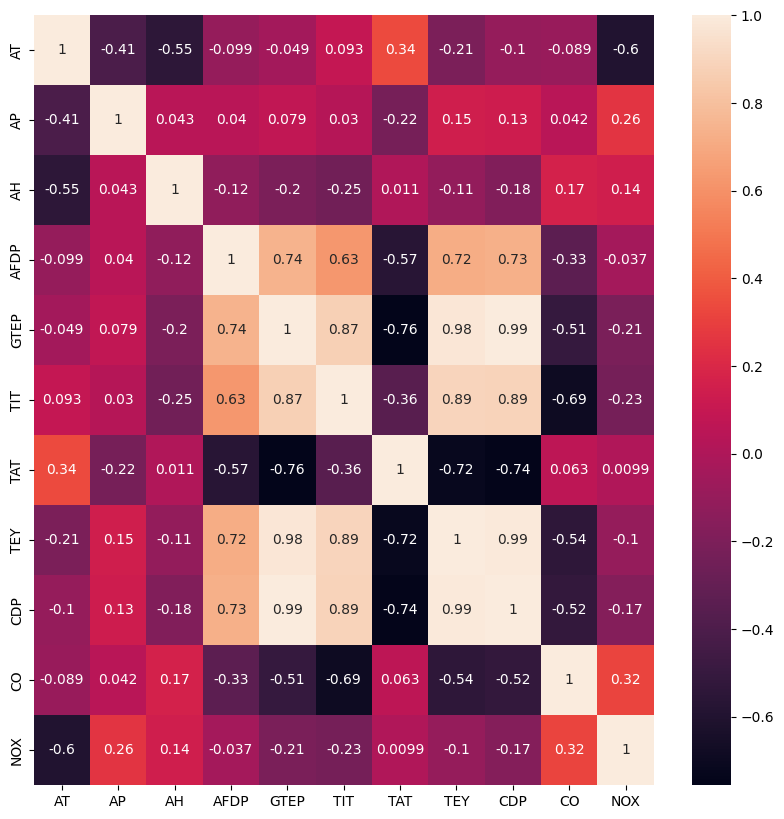

In [81]:
# plotting a correaltion heat map
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

Skew: 0.14596270190452942
Kurtosis: -0.4870582497451621


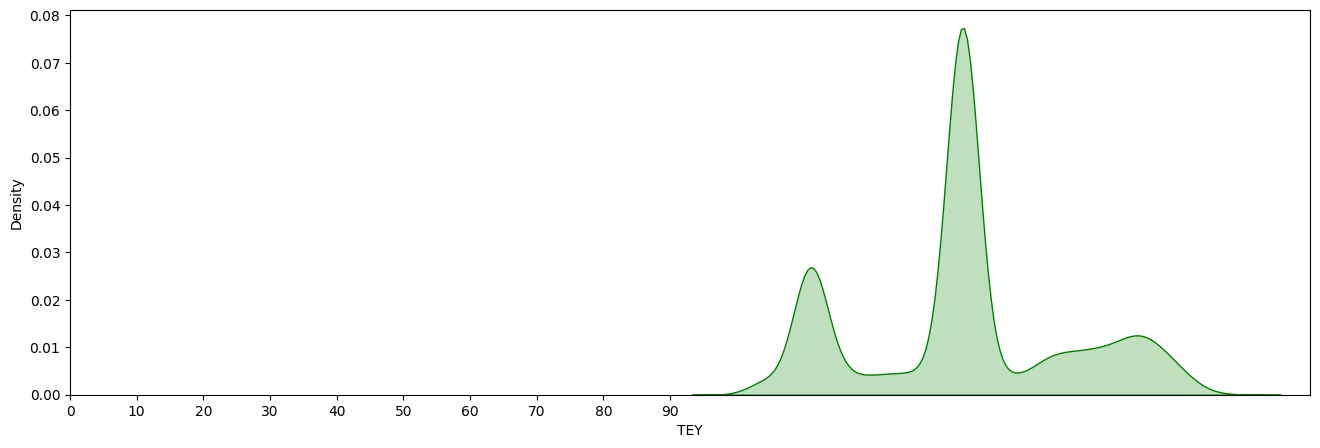

In [67]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(data['TEY'].skew()))
print("Kurtosis: {}".format(data['TEY'].kurtosis()))
ax = sns.kdeplot(data['TEY'],shade=True,color='g')
plt.xticks([i for i in range(0,100,10)])
plt.show()

In [68]:
num_columns = data.select_dtypes(exclude='object').columns.tolist()

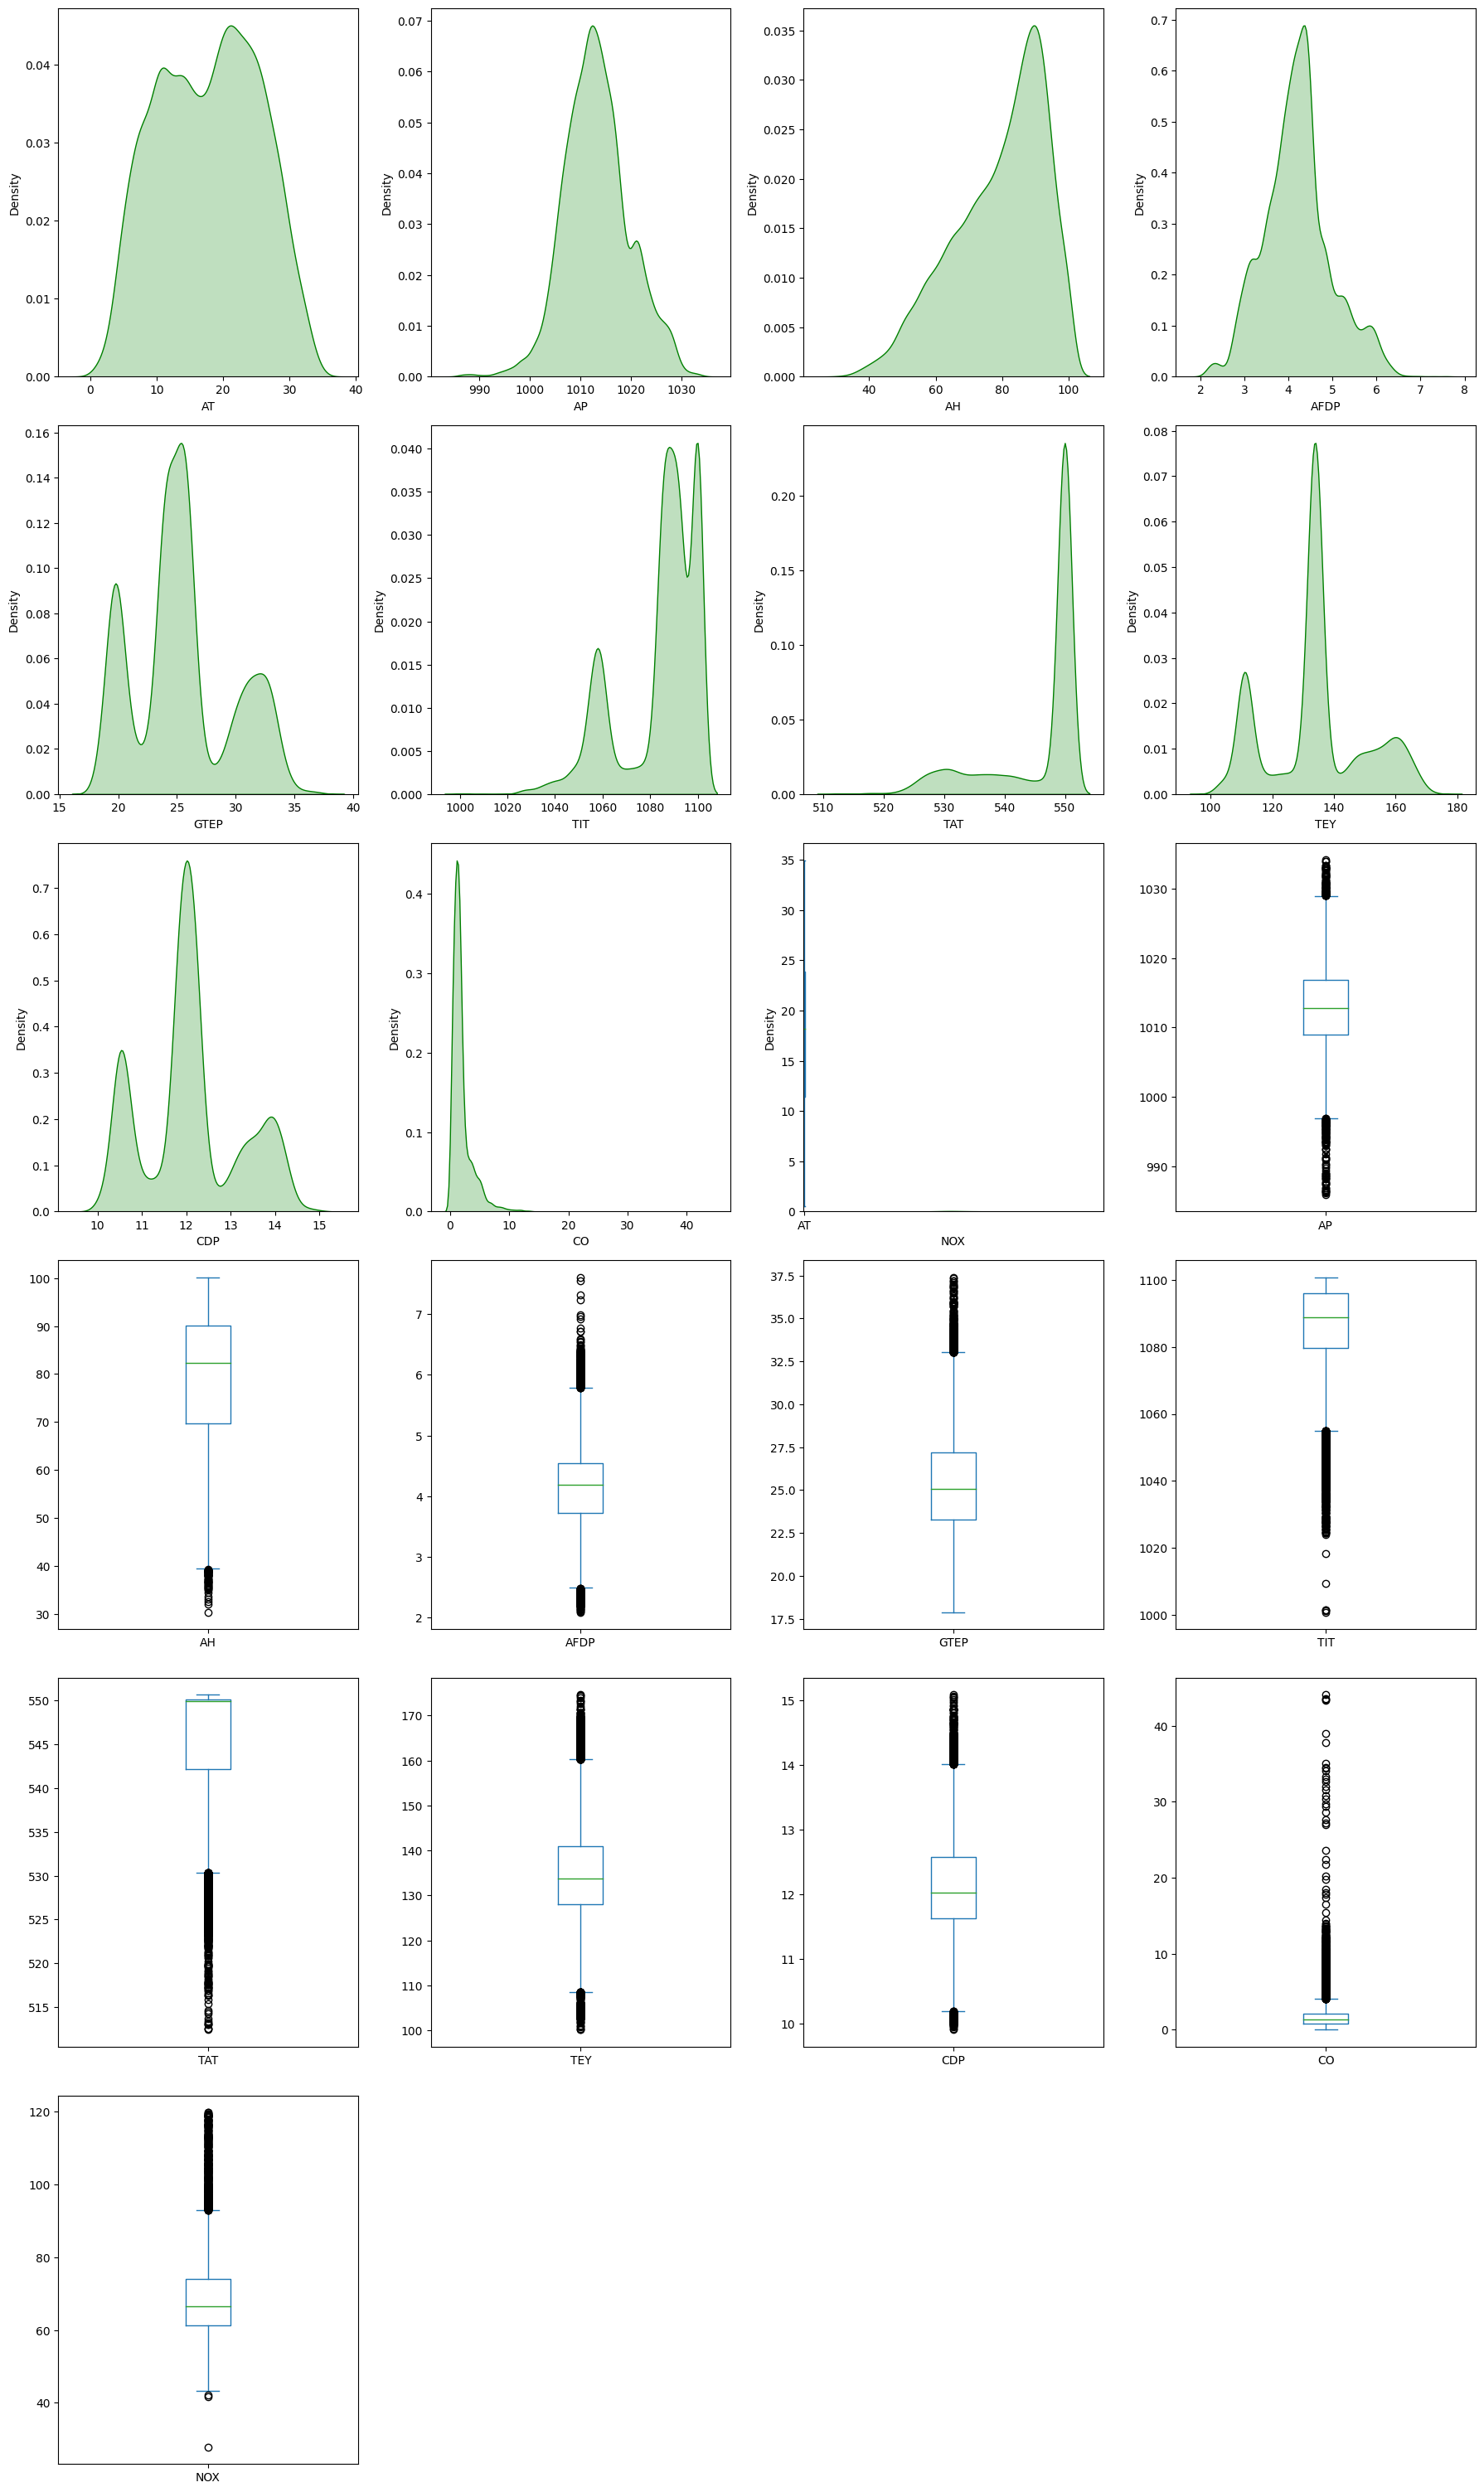

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
skewness,-0.030710,0.107601,-0.681224,0.315150,0.370987,-1.133744,-1.485524,0.145963,0.263042,6.534577,1.126605
kurtosis,-0.987597,0.424070,-0.282476,0.281642,-0.618358,0.375232,0.847637,-0.487058,-0.589420,82.518116,2.660381


In [69]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(data[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    data[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = data[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [70]:
x = data.drop(labels='TEY',axis=1)
y = data['TEY']

In [71]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [72]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [73]:
# Transforming the geography column variable, labels are chosen randomly, the columntransfer asks for argument [1] the index of the target variable
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers = [('encoder', StandardScaler(),[1])], remainder = 'passthrough')
X = np.array(ct.fit_transform(x))
print(X)

[[-0.82664395  6.8594     96.799      ... 10.605       3.1547
  82.722     ]
 [-0.74864748  6.785      97.118      ... 10.598       3.2363
  82.776     ]
 [-0.68625031  6.8977     95.939      ... 10.601       3.2012
  82.468     ]
 ...
 [-1.07623263  7.2647     99.496      ... 10.483       7.9632
  90.912     ]
 [-0.99823616  7.006      99.008      ... 10.533       6.2494
  93.227     ]
 [-0.93583899  6.9279     97.533      ... 10.583       4.9816
  92.498     ]]


In [74]:
import tensorflow as tf
from tensorflow.keras import layers,models

In [75]:
# Initializing the ANN by calling the Sequential class from keras of Tensorflow
ann = models.Sequential([
      layers.Dense(20,input_dim=10,activation = 'relu'),     # Adding "fully connected" INPUT layer to the Sequential ANN by calling Dense class and relu function
      layers.Dense(40,activation = 'relu'),                  # Adding "fully connected" SECOND layer to the Sequential AMM by calling Dense class and relu function
      layers.Dense(1,activation = 'linear')                  # Number of Units = 1 and Activation Function = Linear
    
])

In [76]:
ann.compile(optimizer='adam',loss='mse',metrics=["mse","mae"]) # optimizer is the learning rate and adam defines the best learning rate

In [77]:
ann.fit(x,y,batch_size=100,epochs=500)

Epoch 1/500
151/151 [==============================] - 1s 1ms/step - loss: 186.2376 - mse: 186.2376 - mae: 9.7550
Epoch 2/500
151/151 [==============================] - 0s 1ms/step - loss: 94.1761 - mse: 94.1761 - mae: 7.0708
Epoch 3/500
151/151 [==============================] - 0s 1ms/step - loss: 63.1115 - mse: 63.1115 - mae: 5.9689
Epoch 4/500
151/151 [==============================] - 0s 998us/step - loss: 32.1472 - mse: 32.1472 - mae: 4.3325
Epoch 5/500
151/151 [==============================] - 0s 986us/step - loss: 12.7933 - mse: 12.7933 - mae: 2.7671
Epoch 6/500
151/151 [==============================] - 0s 1ms/step - loss: 5.6431 - mse: 5.6431 - mae: 1.7988
Epoch 7/500
151/151 [==============================] - 0s 1ms/step - loss: 3.8368 - mse: 3.8368 - mae: 1.4351
Epoch 8/500
151/151 [==============================] - 0s 1ms/step - loss: 2.9141 - mse: 2.9141 - mae: 1.2160
Epoch 9/500
151/151 [==============================] - 0s 1ms/step - loss: 2.5712 - mse: 2.5712 - mae: 1

In [78]:
ann.evaluate(x,y)

470/470 [==============================] - 1s 1ms/step - loss: 0.8613 - mse: 0.8613 - mae: 0.7262


[0.8613104224205017, 0.8613104224205017, 0.7261634469032288]